In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from pathlib import Path

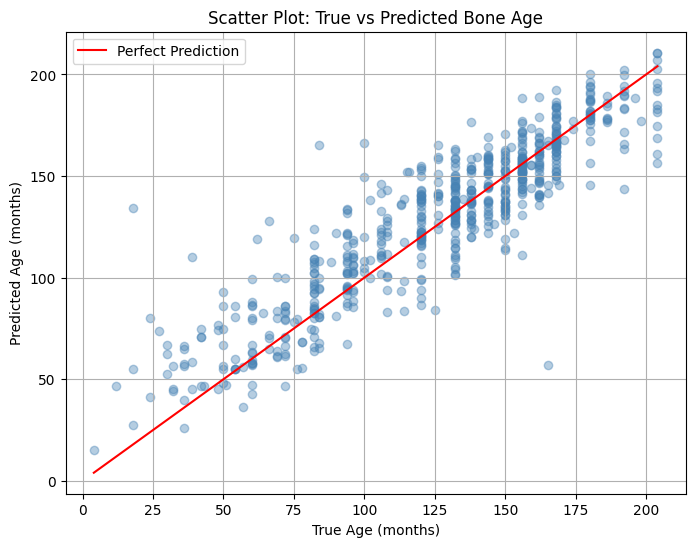

In [3]:
labels = pd.read_csv("submission.csv")
labels["error"] = abs(labels["real"] - labels["prediction"])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(labels["real"], labels["prediction"], alpha=0.4, c='steelblue')
plt.plot([labels["real"].min(), labels["real"].max()], [labels["real"].min(), labels["real"].max()], 
          color='red', linestyle='-', label='Perfect Prediction')

plt.xlabel("True Age (months)")
plt.ylabel("Predicted Age (months)")
plt.title("Scatter Plot: True vs Predicted Bone Age")
plt.legend()
plt.grid(True)
plt.show()

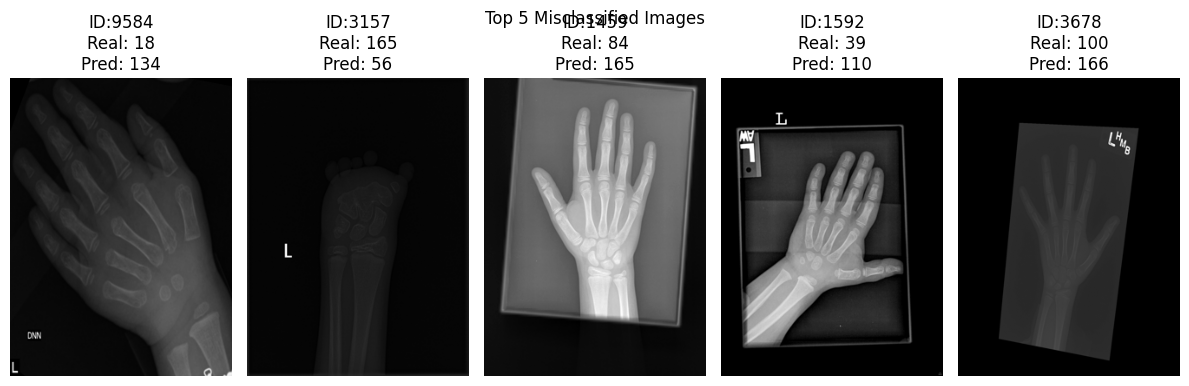

In [4]:
image_dir = Path("data/processed/training-set")
df_sorted = labels.sort_values(by="error", ascending=False)

fig, axes = plt.subplots(1, 5, figsize=(12, 4))

# Show top 5 worst predictions
for idx, row in enumerate(df_sorted.head(5).itertuples()):
	img_path = image_dir / f"{int(row.id)}.png"
	image = Image.open(img_path).convert("L")

	axes[idx].imshow(image, cmap='gray')
	axes[idx].axis("off")
	axes[idx].set_title(f"ID:{row.id}\nReal: {int(row.real)}\nPred: {int(row.prediction)}")

plt.suptitle("Top 5 Misclassified Images")
plt.tight_layout()
plt.show()

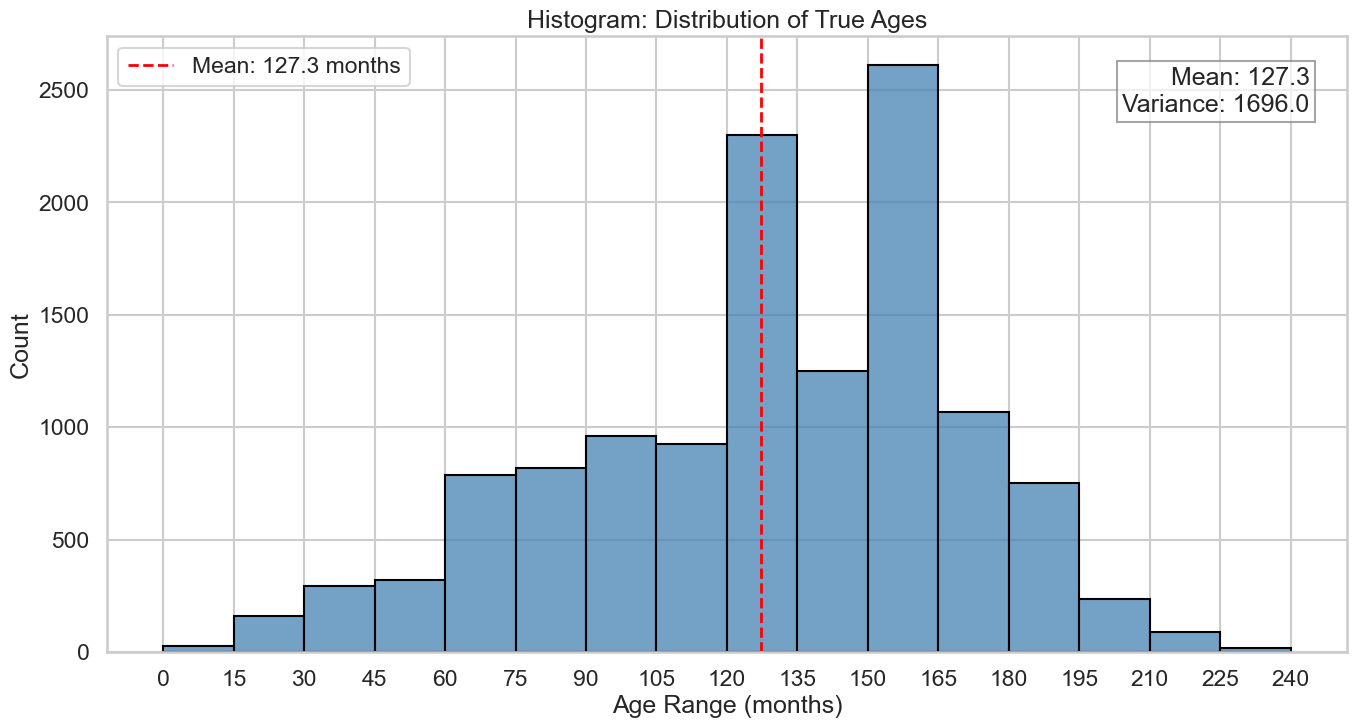

In [19]:
import seaborn as sns

labels = pd.read_csv("data/boneage-training-dataset.csv")

mean_age = labels["boneage"].mean()
variance_age = labels["boneage"].var()

bins = list(range(0, int(labels["boneage"].max() + 15), 15))
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(16, 8))
ax = sns.histplot(labels["boneage"], bins=bins, color="steelblue",
                  edgecolor="black", kde=False)

plt.xlabel("Age Range (months)")
plt.ylabel("Count")
plt.title("Histogram: Distribution of True Ages")
plt.xticks(bins)

plt.axvline(mean_age, color="red", linestyle="dashed", linewidth=2,
            label=f"Mean: {mean_age:.1f} months")
plt.text(0.97, 0.95,
         f"Mean: {mean_age:.1f}\nVariance: {variance_age:.1f}",
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.legend()
plt.show()

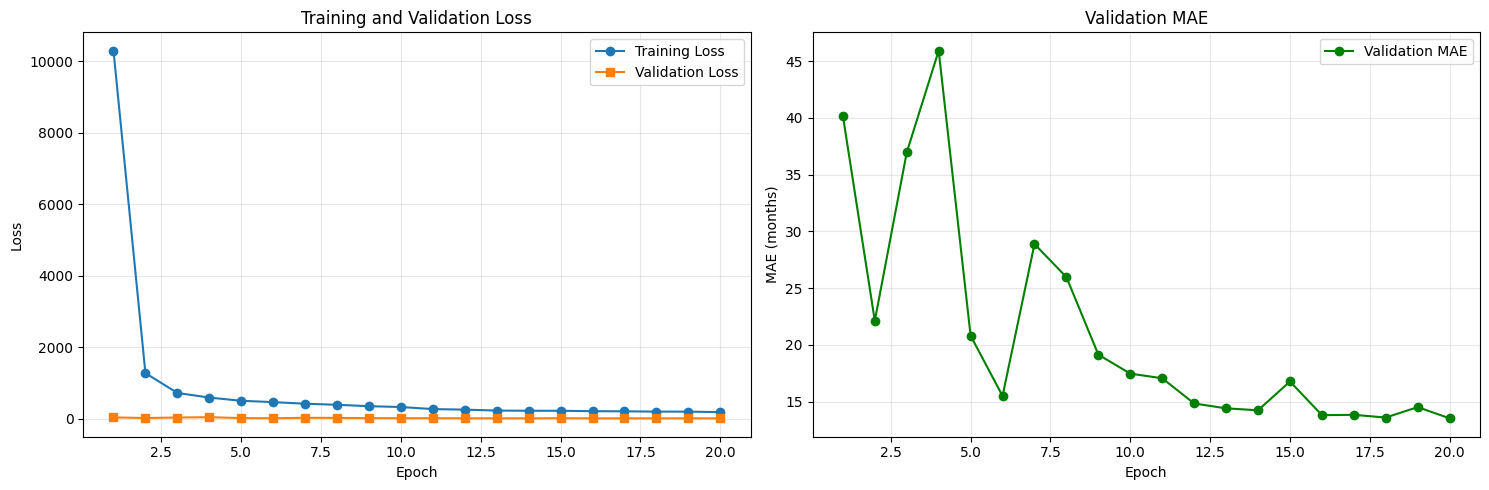

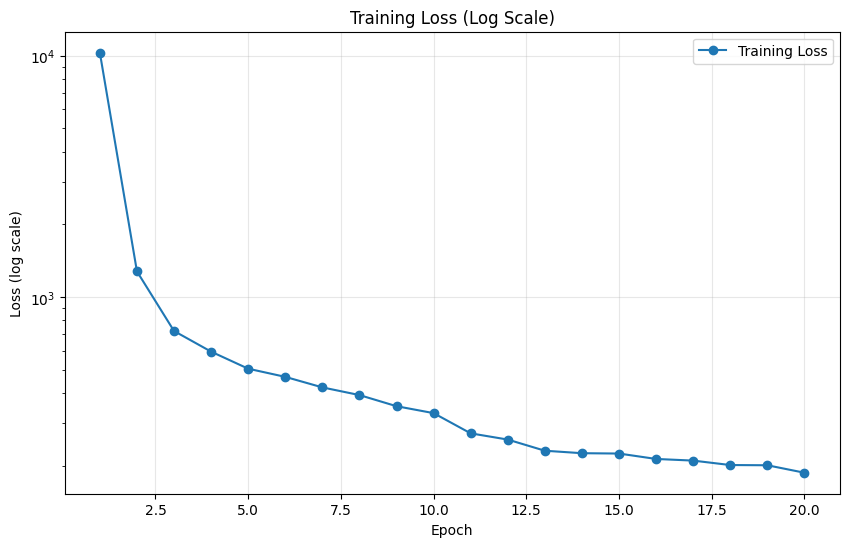

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 21))
train_losses = [10296.15, 1278.15, 723.66, 594.33, 505.05, 467.23, 422.59, 392.74, 353.14, 330.56, 272.55, 256.85, 230.92, 225.53, 224.78, 213.48, 210.15, 201.44, 201.01, 187.20]
val_losses = [40.19, 22.12, 36.97, 45.87, 20.79, 15.50, 28.83, 25.96, 19.11, 17.42, 17.04, 14.83, 14.42, 14.23, 16.77, 13.77, 13.83, 13.57, 14.51, 13.53]
val_maes = [40.20, 22.12, 36.96, 45.92, 20.81, 15.50, 28.89, 25.97, 19.14, 17.47, 17.06, 14.84, 14.41, 14.24, 16.78, 13.81, 13.84, 13.60, 14.52, 13.53]

# Training Loss (separate plot)
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, 'o-', color='blue', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('training_loss.png', dpi=300)
plt.show()

# Validation Loss (separate plot)
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_losses, 'o-', color='red', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Validation Loss Over Epochs', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('validation_loss.png', dpi=300)
plt.show()

# Validation MAE (separate plot)
plt.figure(figsize=(10, 6))
plt.plot(epochs, val_maes, 'o-', color='green', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('MAE (months)', fontsize=12)
plt.title('Validation Mean Absolute Error', fontsize=14)
plt.grid(True, alpha=0.3)
plt.savefig('validation_mae.png', dpi=300)
plt.show()